<a href="https://colab.research.google.com/github/dkshi/neural_networks/blob/main/MNISTNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [ ]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

In [ ]:
X_train.shape

torch.Size([60000, 28, 28])

In [ ]:
X_train = X_train.float()
X_test = X_test.float()

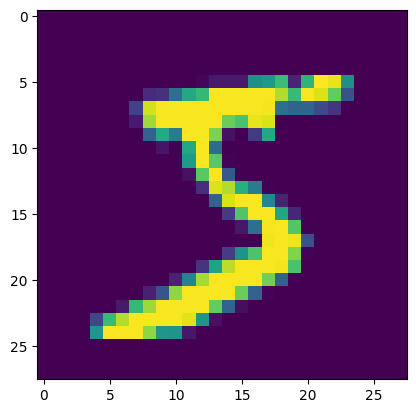

tensor(5)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [ ]:
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

In [ ]:
class MNISTNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(MNISTNet, self).__init__()
    self.fc1 = torch.nn.Linear(28*28, n_hidden_neurons)
    self.ac1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)

  def forward(self, x):
    x = self.fc1(x)
    x = self.ac1(x)
    x = self.fc2(x)
    return x

mnist_net = MNISTNet(100)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
list(mnist_net.parameters())

[Parameter containing:
 tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
         [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
         [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
         ...,
         [ 0.0221,  0.0258, -0.0088,  ..., -0.0141,  0.0051, -0.0318],
         [-0.0217, -0.0136,  0.0185,  ..., -0.0012, -0.0012, -0.0017],
         [ 0.0142,  0.0089, -0.0053,  ...,  0.0311, -0.0181,  0.0020]],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-3.5402e-02,  1.8178e-02, -2.1709e-02, -1.1839e-02,  4.8722e-03,
         -1.0492e-02, -1.9008e-02,  2.6994e-02, -3.4899e-02,  1.0381e-02,
         -3.5228e-02, -5.6381e-03, -2.0134e-02, -3.0264e-02, -1.3289e-02,
          2.5346e-02, -1.0797e-02,  2.1568e-03,  4.3630e-03, -2.1916e-02,
          2.2670e-02, -1.5766e-02,  3.4906e-02, -2.3063e-02, -6.8216e-03,
          2.7051e-02, -1.3991e-02,  9.7218e-03, -9.9075e-04,  1.6625e-03,
          2.3455e-02, -

In [ ]:

from statistics import mean
batch_size = 100

X_test = X_test.to(device)
y_test = y_test.to(device)

test_accuracy_history = []
train_accuracy_history = []
test_loss_history = []
train_loss_history = []


for epoch in range(10000):
  order = np.random.permutation(len(X_train))
  temp_train_loss = []

  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    X_batch = X_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)

    preds = mnist_net.forward(X_batch)

    loss_value = loss(preds, y_batch)
    temp_train_loss.append(float(loss_value))
    loss_value.backward()

    optimizer.step()

  test_preds = mnist_net.forward(X_test)
  test_loss_history.append(float(loss(test_preds, y_test)))
  train_loss_history.append(mean(temp_train_loss))

  accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
  test_accuracy_history.append(accuracy)

  print(accuracy)

tensor(0.9073, device='cuda:0')
tensor(0.9177, device='cuda:0')
tensor(0.9235, device='cuda:0')
tensor(0.9172, device='cuda:0')
tensor(0.9218, device='cuda:0')
tensor(0.9247, device='cuda:0')
tensor(0.9289, device='cuda:0')
tensor(0.9262, device='cuda:0')
tensor(0.9311, device='cuda:0')
tensor(0.9314, device='cuda:0')
tensor(0.9388, device='cuda:0')
tensor(0.9284, device='cuda:0')
tensor(0.9312, device='cuda:0')
tensor(0.9383, device='cuda:0')
tensor(0.9374, device='cuda:0')
tensor(0.9346, device='cuda:0')
tensor(0.9401, device='cuda:0')
tensor(0.9434, device='cuda:0')
tensor(0.9426, device='cuda:0')
tensor(0.9390, device='cuda:0')
tensor(0.9438, device='cuda:0')
tensor(0.9434, device='cuda:0')
tensor(0.9388, device='cuda:0')
tensor(0.9387, device='cuda:0')
tensor(0.9411, device='cuda:0')
tensor(0.9394, device='cuda:0')
tensor(0.9432, device='cuda:0')
tensor(0.9444, device='cuda:0')
tensor(0.9426, device='cuda:0')
tensor(0.9484, device='cuda:0')
tensor(0.9469, device='cuda:0')
tensor(0

KeyboardInterrupt: ignored

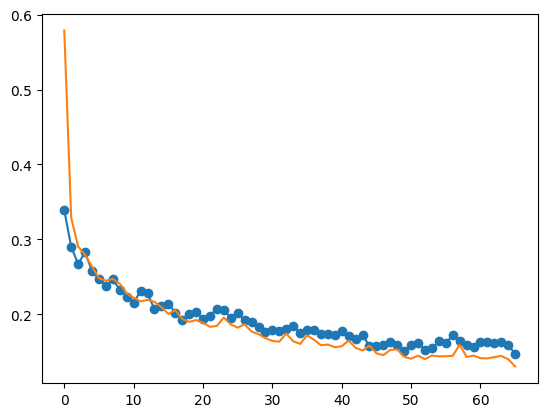

In [ ]:
plt.plot(test_loss_history, marker='o')
plt.plot(train_loss_history)